Planning your dream vacation, or even a weekend escape, can be an overwhelming affair. With hundreds, even thousands, of hotels to choose from at every destination, it's difficult to know which will suit your personal preferences. Should you go with an old standby with those pillow mints you like, or risk a new hotel with a trendy pool bar? 

expedia icon

Expedia wants to take the proverbial rabbit hole out of hotel search by providing personalized hotel recommendations to their users. This is no small task for a site with hundreds of millions of visitors every month!

Currently, Expedia uses search parameters to adjust their hotel recommendations, but there aren't enough customer specific data to personalize them for each user. In this competition, Expedia is challenging you to contextualize customer data and predict the likelihood a user will stay at 100 different hotel groups.

Data Description:

Expedia has provided you logs of customer behavior. These include what customers searched for, how they interacted with search results (click/book), whether or not the search result was a travel package. The data in this project is a random selection from Expedia and is not representative of the overall statistics.

Expedia is interested in predicting which hotel group a user is going to book. Expedia has in-house algorithms to form hotel clusters, where similar hotels for a search (based on historical price, customer star ratings, geographical locations relative to city center, etc) are grouped together. These hotel clusters serve as good identifiers to which types of hotels people are going to book, while avoiding outliers such as new hotels that don't have historical data.

Your goal of this project is to predict the booking outcome (hotel cluster) for a user event, based on their search and other attributes associated with that user event.

The train and test datasets are split based on time: training data from 2013 and 2014, while test data are from 2015. Training data includes all the users in the logs, including both click events and booking events. Test data only includes booking events.

destinations.csv data consists of features extracted from hotel reviews text.

Note that some srch_destination_id's in the train/test files don't exist in the destinations.csv file. This is because some hotels are new and don't have enough features in the latent space. Your algorithm should be able to handle this missing information.

Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train=pd.read_csv('/users/arissa/Desktop/expedia/train.csv', nrows=100000)
test=pd.read_csv('/users/arissa/Desktop/expedia/test.csv', nrows=100000)

In [4]:
train

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2013-04-01 14:26:31,37,1,69,612,3062,NaN,391007,0,0,...,0,1,20590,6,0,1,6,180,1518,30
99996,2013-04-01 17:01:22,37,1,69,612,3062,NaN,391007,0,0,...,0,1,9820,3,0,1,6,180,1737,5
99997,2013-04-01 17:04:26,37,1,69,612,3062,NaN,391007,0,0,...,0,1,9820,3,0,1,6,180,1737,93
99998,2013-04-01 17:05:01,37,1,69,612,3062,NaN,391007,0,0,...,0,1,9820,3,0,1,6,180,1737,20


In [5]:
test

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,39994,2015-04-23 18:53:20,2,3,66,318,5206,611.8266,134025,0,...,2015-04-29,2015-04-30,2,0,2,12178,6,2,50,350
39995,39995,2015-08-14 06:56:58,2,3,66,318,55734,NaN,134025,0,...,2015-08-31,2015-09-01,1,0,1,26628,1,2,50,601
39996,39996,2015-09-09 12:10:38,2,3,66,318,55734,NaN,134025,0,...,2015-10-04,2015-10-07,1,0,1,25065,1,2,50,696
39997,39997,2015-10-02 14:00:54,2,3,66,318,29466,810.7520,134025,0,...,2015-10-06,2015-10-07,1,0,1,26194,6,2,50,1019


**All the dates in test.csv are 1 year later than the dates in train.csv .The testing set contains dates from 2015 ,and the training set contains dates from 2013 and 2014.**

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_time                  100000 non-null  object 
 1   site_name                  100000 non-null  int64  
 2   posa_continent             100000 non-null  int64  
 3   user_location_country      100000 non-null  int64  
 4   user_location_region       100000 non-null  int64  
 5   user_location_city         100000 non-null  int64  
 6   orig_destination_distance  63078 non-null   float64
 7   user_id                    100000 non-null  int64  
 8   is_mobile                  100000 non-null  int64  
 9   is_package                 100000 non-null  int64  
 10  channel                    100000 non-null  int64  
 11  srch_ci                    99929 non-null   object 
 12  srch_co                    99929 non-null   object 
 13  srch_adults_cnt            100

In [8]:
# set date as datetime
train = pd.read_csv('/users/arissa/Desktop/expedia/train.csv', parse_dates=['date_time'] ,sep=',',nrows=200000)

**Our goal is to predict the booking outcome (hotel cluster) for a user event, based on their search and other attributes associated with that user event. According to the description given by Expedia, there are 100 clusters in total.**

## Missing Values

In [14]:
train.isnull().sum()


date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    69637
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        177
srch_co                        177
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

In [21]:
total=train.isnull().sum().sort_values(ascending=False)
# calculate missing values account for what percentage 
percent=(train.isnull().sum()/train['hotel_cluster'].count()).sort_values(ascending=False)

In [22]:
missing_data=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
orig_destination_distance,69637,0.348185
srch_ci,177,0.000885
srch_co,177,0.000885
channel,0,0.000000
site_name,0,0.000000
posa_continent,0,0.000000
user_location_country,0,0.000000
user_location_region,0,0.000000
user_location_city,0,0.000000
user_id,0,0.000000


In [23]:
# we do the same on "test" data

total=test.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train['hotel_cluster'].count()).sort_values(ascending=False)
missing_data=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
orig_destination_distance,13371.0,0.348185
hotel_market,0.0,0.000000
hotel_country,0.0,0.000000
date_time,0.0,0.000000
site_name,0.0,0.000000
posa_continent,0.0,0.000000
user_location_country,0.0,0.000000
user_location_region,0.0,0.000000
user_location_city,0.0,0.000000
user_id,0.0,0.000000


In [24]:
# use mean to impute missing data for "orig_destination_distance"

train['orig_destination_distance'].fillna(train['orig_destination_distance'].mean(), inplace=True)
test['orig_destination_distance'].fillna(test['orig_destination_distance'].mean(), inplace=True)

In [25]:
train.isna().sum()

date_time                      0
site_name                      0
posa_continent                 0
user_location_country          0
user_location_region           0
user_location_city             0
orig_destination_distance      0
user_id                        0
is_mobile                      0
is_package                     0
channel                        0
srch_ci                      177
srch_co                      177
srch_adults_cnt                0
srch_children_cnt              0
srch_rm_cnt                    0
srch_destination_id            0
srch_destination_type_id       0
is_booking                     0
cnt                            0
hotel_continent                0
hotel_country                  0
hotel_market                   0
hotel_cluster                  0
dtype: int64

In [26]:
# we drop other missing values
train.dropna(inplace=True)
test.dropna(inplace=True)

In [28]:
train.shape


(199823, 24)

In [29]:
test.shape

(39999, 22)

## Visualization

**A Heatmap to infer the correlation between different columns with each other and to check if there is any linear correlation between any columns.**

<AxesSubplot:>

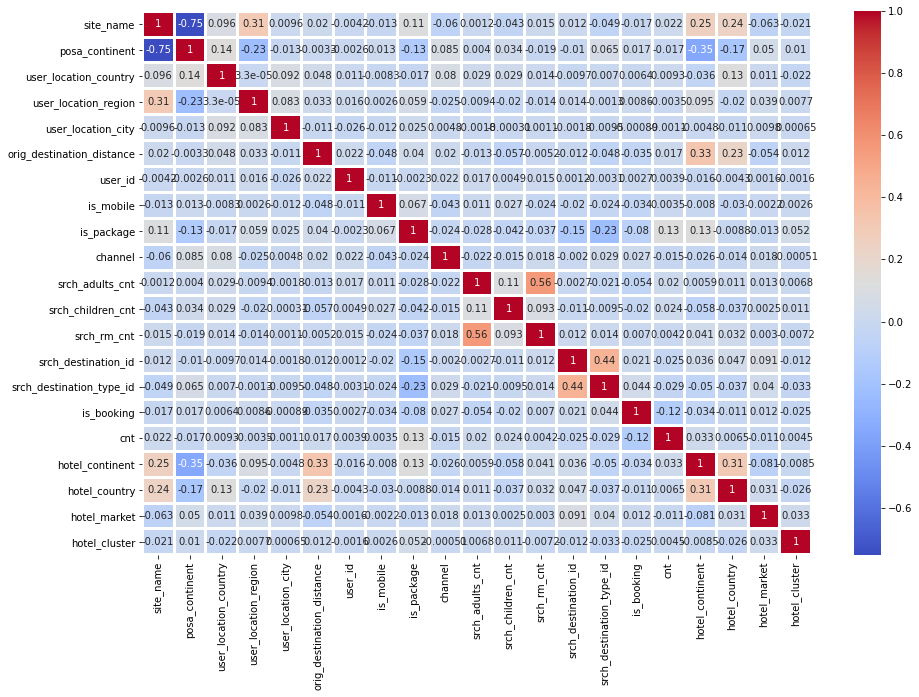

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(train.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

**This tell us that no column correlate linearly with any other column in the dataset.**

## Basic Visualization
### 2. Frequency of bookings through mobile


<AxesSubplot:xlabel='is_mobile', ylabel='count'>

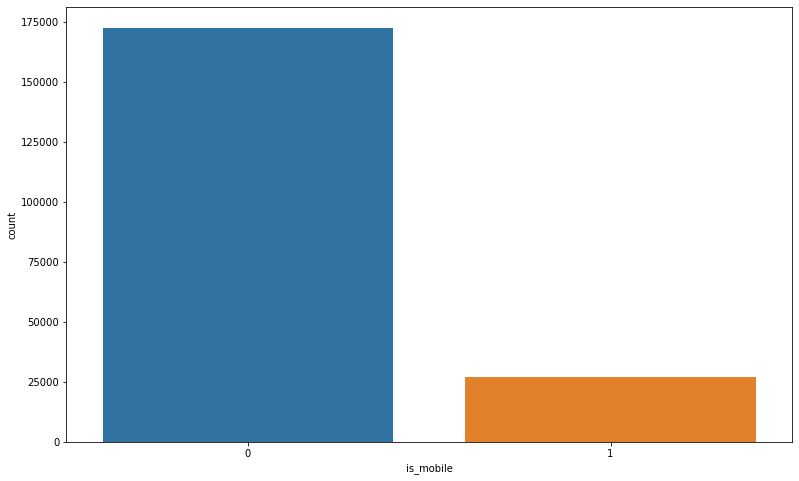

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='is_mobile',data=train, order=[0,1],ax=ax)

Suggestion:**Customers book their hotels from Expedia Website rather than mobile. So we can suggest Expedia to make more interactive, easy to use website so customers can easily book their hotels**

<AxesSubplot:xlabel='is_package', ylabel='count'>

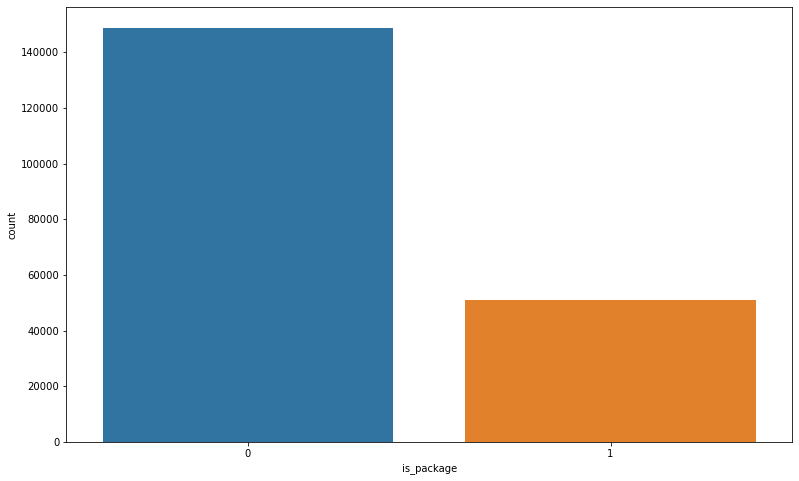

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='is_package',data=train, order=[0,1], ax=ax)

**The number of customers booking their hotels with total package i.e with travel are less. We can interpret this that there can be many reasons of this like booking with travel is getting very expensive or less range of hotels where the customer wants to travel to.**

### 4. Frequency of Continent site used for booking

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='posa_continent', ylabel='count'>

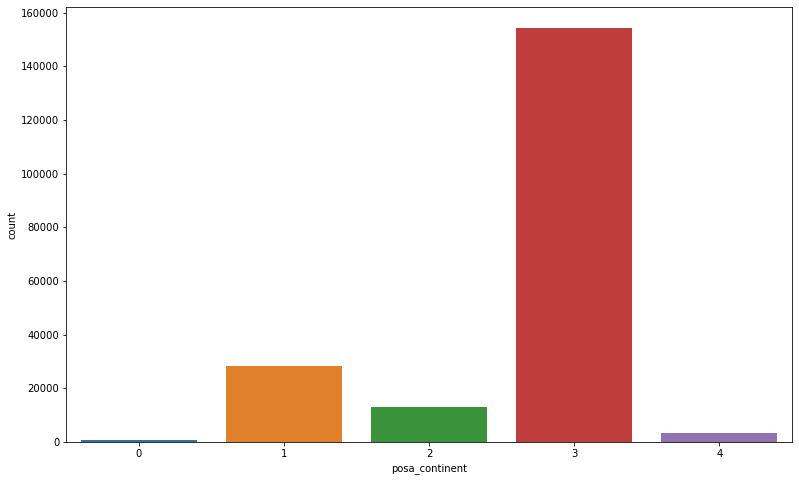

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('posa_continent', data=train,order=[0,1,2,3,4],ax=ax)

**Most of people booking are from continent 3. Maybe people there have more expending power. So Expedia can increase its business by increasing more hotel options, more variety, better user experience, etc. For other continents Expedia can lower its prices on hotel or give discounts, loyalty points.**

### 5. Which continent has the most number of hotels?

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hotel_continent', ylabel='count'>

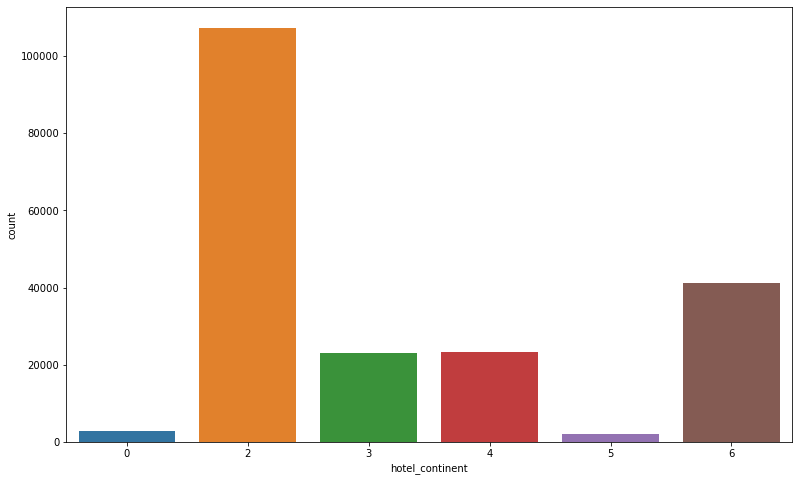

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('hotel_continent', data=train,order=[0,2,3,4,5,6],ax=ax)

In [ ]:
### 6. Putting the two above together

<AxesSubplot:xlabel='hotel_continent', ylabel='count'>

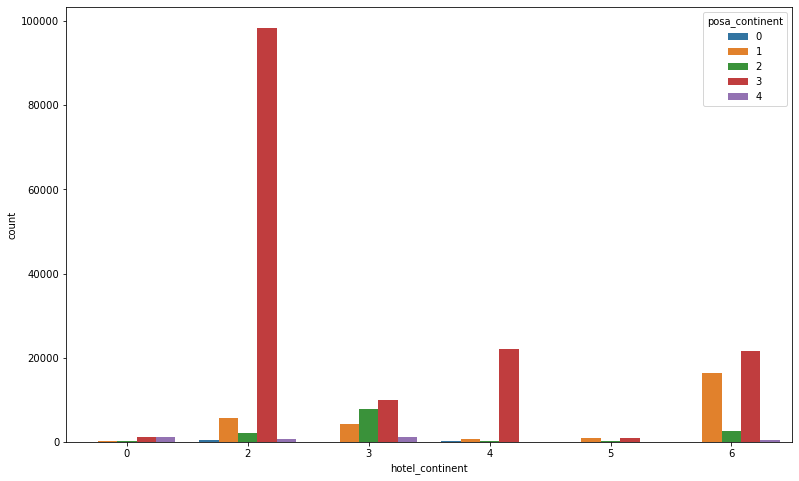

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='hotel_continent', hue='posa_continent', data=train)

## Let us look at data specifically where customers have made a booking

In [54]:
bookings=train[train["is_booking"] == 1]
bookings

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.264100,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
20,2014-02-27 18:01:32,2,3,66,318,52078,1953.335631,756,0,1,...,0,1,8291,1,1,1,2,50,191,2
27,2013-06-15 15:38:05,30,4,195,548,56440,1953.335631,1048,0,1,...,0,1,1385,1,1,1,0,185,185,58
72,2014-11-23 18:02:20,30,4,195,991,47725,1953.335631,1048,0,0,...,0,1,8803,1,1,1,3,151,69,36
79,2014-01-03 16:30:17,2,3,66,462,41898,2454.858800,1482,0,1,...,0,2,12009,1,1,1,2,50,680,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199961,2014-06-08 18:16:57,2,3,66,363,12346,285.085400,739952,0,0,...,0,1,40161,3,1,1,2,50,1378,15
199965,2014-11-11 13:43:09,2,3,66,363,10969,1953.335631,739952,1,0,...,0,1,40161,3,1,1,2,50,1378,15
199970,2014-05-06 09:47:24,2,3,230,395,36062,1953.335631,739972,0,0,...,0,1,25702,6,1,1,2,50,688,37
199984,2014-05-15 10:16:43,2,3,230,395,36062,1953.335631,739972,0,0,...,0,1,8829,1,1,1,2,50,693,55


### 7. What are the most countries the customer travel from?

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user_location_country', ylabel='count'>

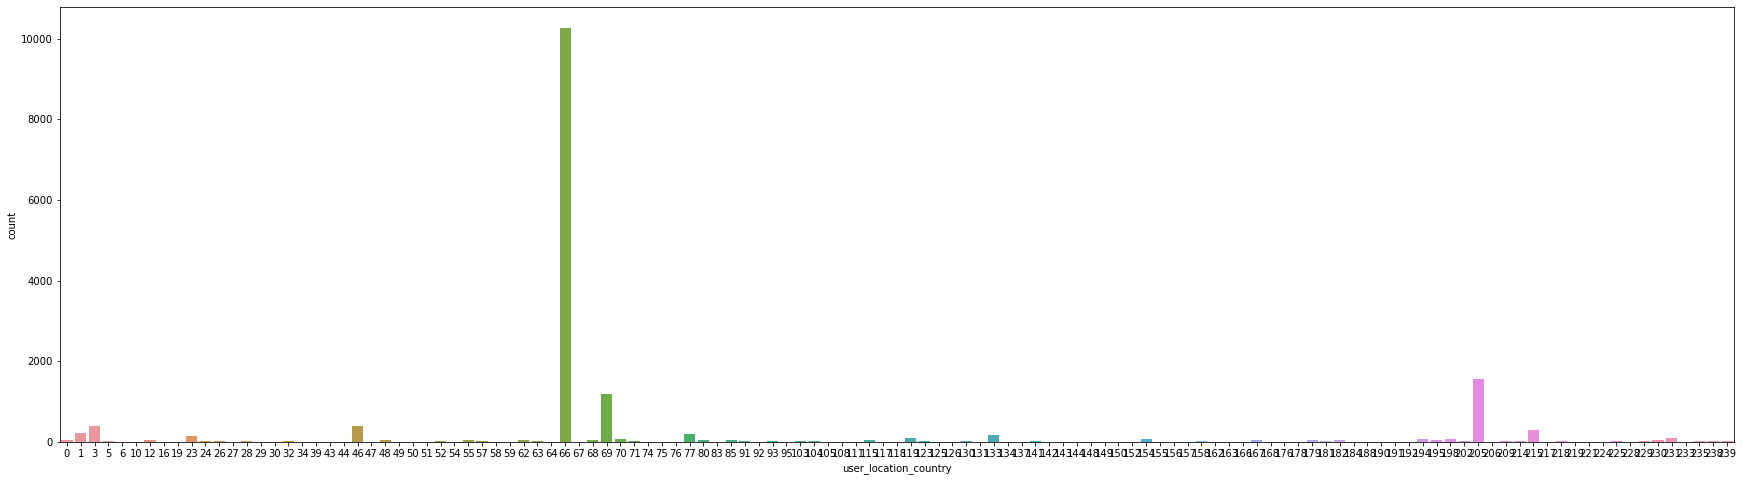

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(30,8)
sns.countplot('user_location_country',data=bookings.sort_values(by=['user_location_country']))

**If customers are travelling from 66th country the most, we can give an insight to Expedia to give discounts to regular and most frequent customers to boost the business and to see why other countries have so low bookings of hotels, is it beacuse of the price, less number of hotels, less facilities in a hotel.**

In [59]:
# popular travel destination

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hotel_country', ylabel='count'>

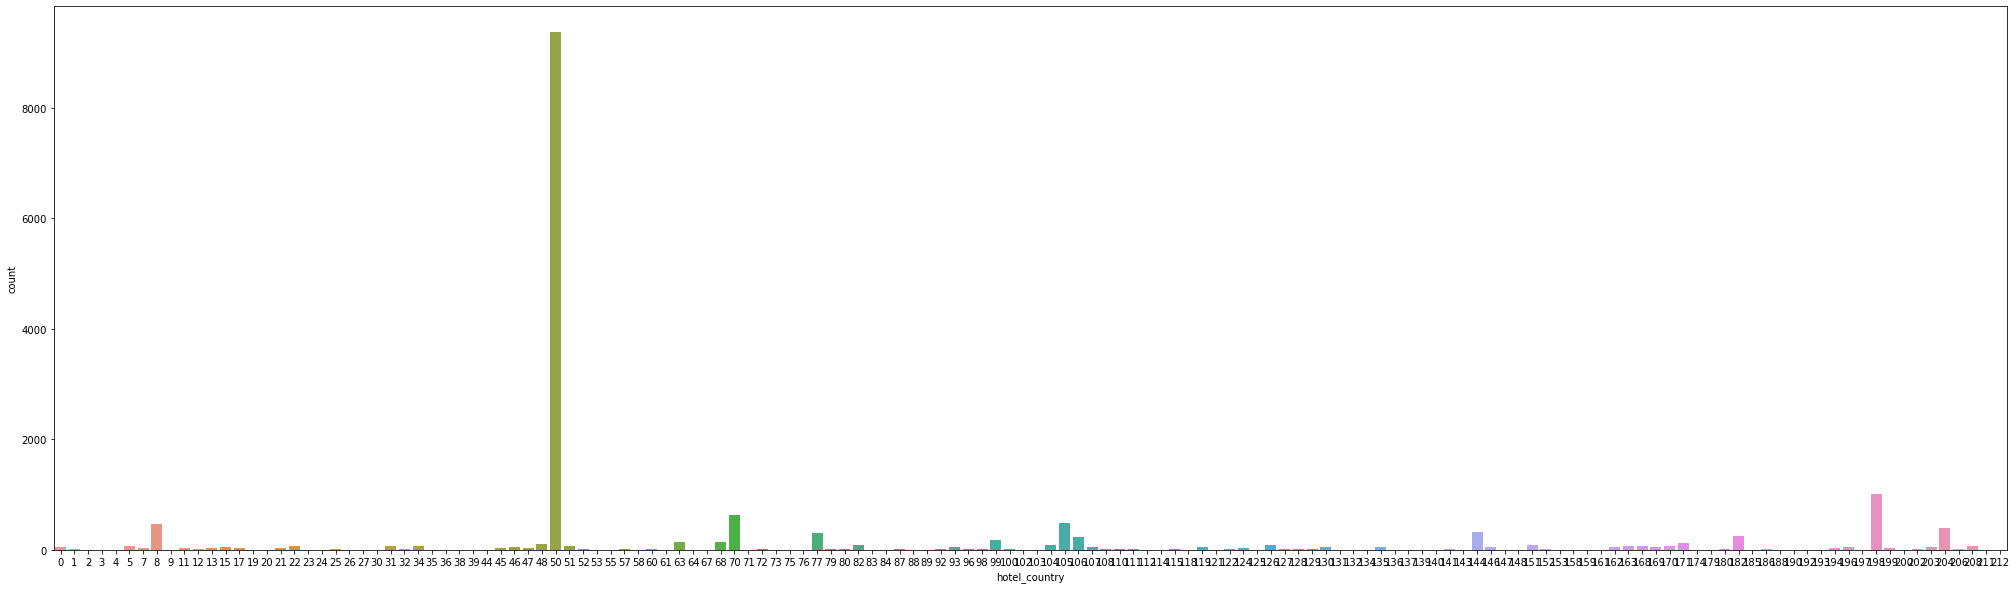

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(35,10)
sns.countplot('hotel_country',data=bookings.sort_values(by=['hotel_country']))

**If customers are travelling to 50th country the most, we can give an insight to Expedia to give more recommendations of different hotel with different range of prices, with different facilities, with different locations i.e hotels in every region, every city of the 50th country.**

### 9. How many people by continent are booking from mobile?

<AxesSubplot:xlabel='posa_continent', ylabel='count'>

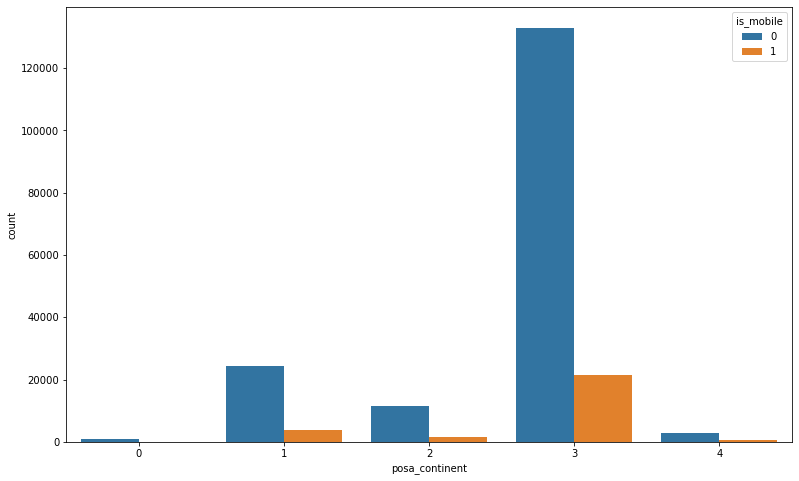

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x='posa_continent', hue='is_mobile', data = train)

**This graph we can use to give an insight to Expedia that to improve desktop website interface and to make it more interactive, easy payment and website doesn't crash when lot of customer tries to book their ticket rather than on mobile interface** 

<AxesSubplot:xlabel='user_location_country', ylabel='count'>

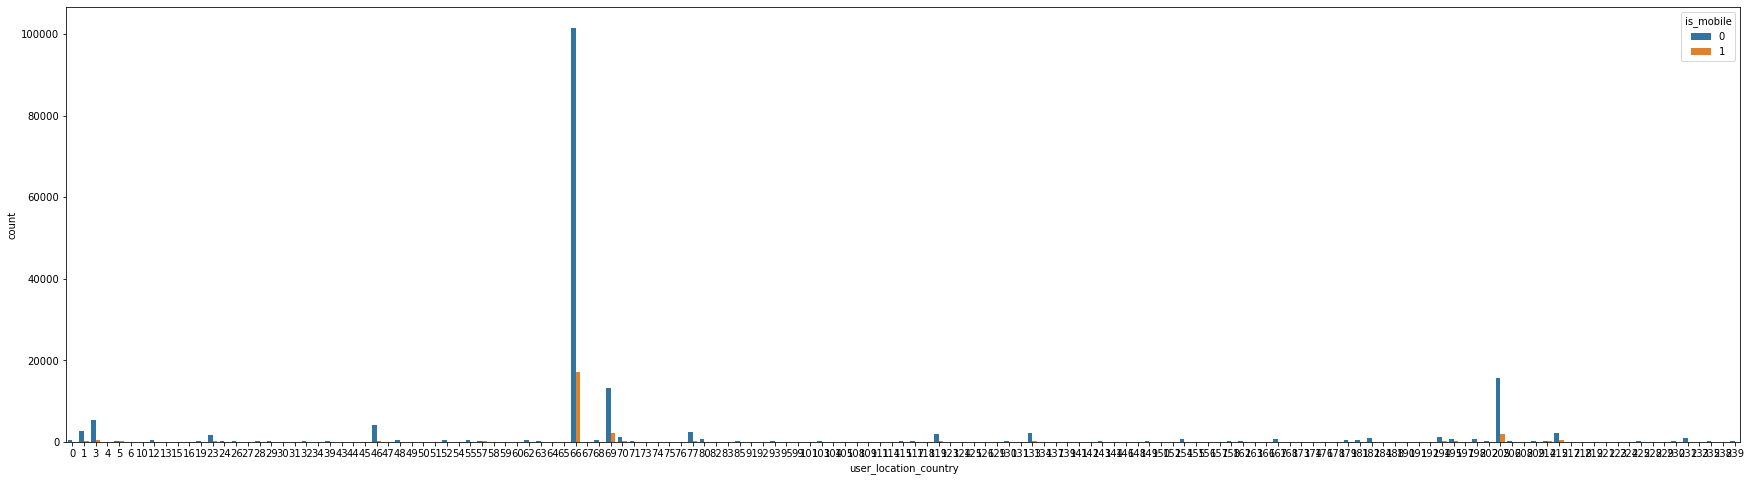

In [62]:
### 10. How many people by country are booking from mobile?
fig, ax = plt.subplots()
fig.set_size_inches(30, 8)
sns.countplot(x='user_location_country', hue='is_mobile', data = train)

<AxesSubplot:>

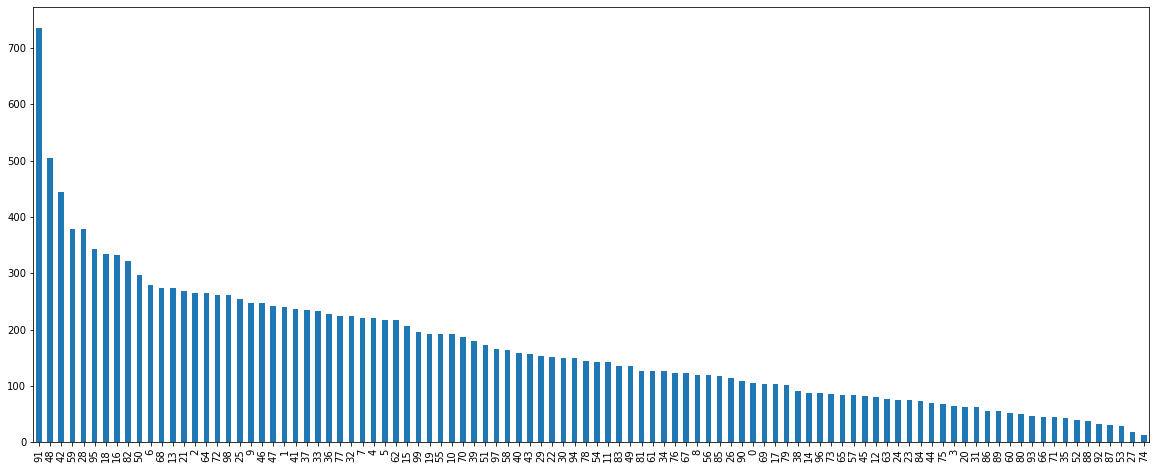

In [63]:
bookings['hotel_cluster'].value_counts().plot(kind='bar',figsize=(20,8))

Hotel cluster 91 is the most booked hotel

### 12. What's the most impactful channel?

<AxesSubplot:xlabel='channel', ylabel='count'>

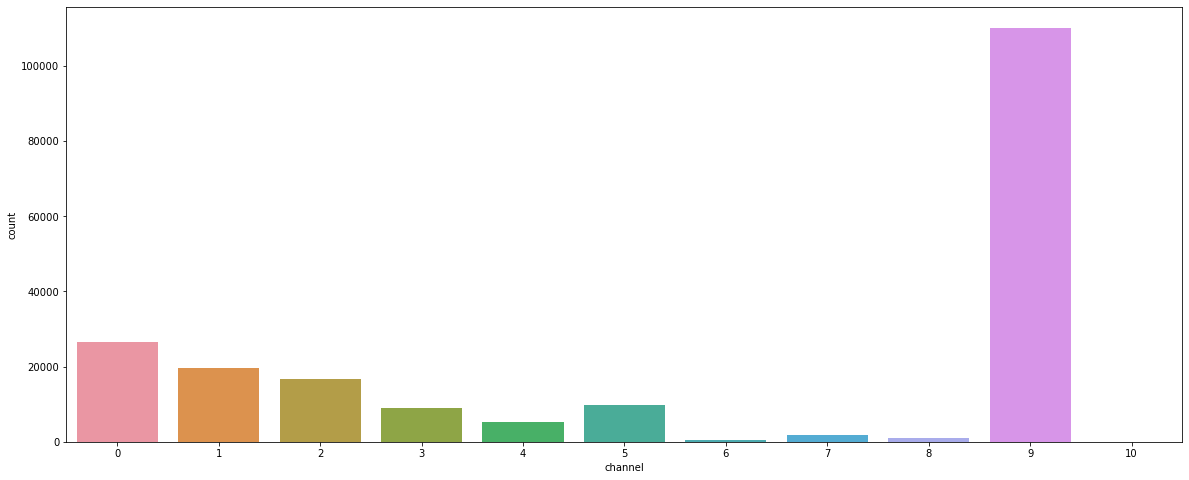

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='channel',data=train)

Marketing channel 9 is the most successful

## Feature Engineering

In [69]:
train

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.264100,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.264100,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.264100,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.193200,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.625900,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2013-03-06 18:11:28,40,3,66,467,18259,1360.080900,740408,0,0,...,0,1,8881,6,0,4,2,50,1633,55
199996,2013-03-06 19:04:49,40,3,66,467,18259,1360.129400,740408,0,0,...,0,1,8881,6,1,1,2,50,1633,13
199997,2013-03-23 08:21:59,40,3,66,467,30406,1953.335631,740408,0,0,...,0,1,8261,1,0,9,2,50,646,48
199998,2013-03-23 08:39:41,40,3,66,467,30406,1953.335631,740408,0,0,...,0,1,8261,1,0,4,2,50,646,91


**We can find out the duration of stay of the customers by subtracting the date of check-in to check-out to help Expedia to categorize the hotels like "Long Trips" where customers book their hotels for long period of time or "Short Trips" where customers book their hotels for short period of time. This could help to recommend other customers when those customers choose the same search parameters like "Long Trips" and "Short Trips".**

**Moreover if we seprate day, month and year it can also help us to find the business of Expedia over the years i.e customers booking in which year, month or day the most.**

## Feature Engineering

In [72]:
def convert_date_into_days(df):
    df['srch_ci']=pd.to_datetime(df['srch_ci'])
    df['srch_co']=pd.to_datetime(df['srch_co'])
    
    df['stay_duration'] = (df['srch_co'] - df['srch_ci']).astype('timedelta64[D]')
    df['no_of_prior_days_booking'] = (df['srch_ci'] - df['date_time']).astype('timedelta64[D]')
    
    
    #     For hotel check-in
#     Month, Year, Day
    df['Cin_day'] = df["srch_ci"].dt.day
    df['Cin_month'] = df["srch_ci"].dt.month
    df['Cin_year'] = df["srch_ci"].dt.year
    return df

In [73]:
train = convert_date_into_days(train)

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199823 entries, 0 to 199999
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_time                  199823 non-null  datetime64[ns]
 1   site_name                  199823 non-null  int64         
 2   posa_continent             199823 non-null  int64         
 3   user_location_country      199823 non-null  int64         
 4   user_location_region       199823 non-null  int64         
 5   user_location_city         199823 non-null  int64         
 6   orig_destination_distance  199823 non-null  float64       
 7   user_id                    199823 non-null  int64         
 8   is_mobile                  199823 non-null  int64         
 9   is_package                 199823 non-null  int64         
 10  channel                    199823 non-null  int64         
 11  srch_ci                    199823 non-null  datetime

In [75]:
train

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,stay_duration,no_of_prior_days_booking,Cin_day,Cin_month,Cin_year
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.264100,12,0,1,...,3,2,50,628,1,4.0,15.0,27,8,2014
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.264100,12,0,1,...,1,2,50,628,1,4.0,17.0,29,8,2014
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.264100,12,0,0,...,1,2,50,628,1,4.0,17.0,29,8,2014
3,2014-08-09 18:05:16,2,3,66,442,35390,913.193200,93,0,0,...,1,2,50,1457,80,5.0,105.0,23,11,2014
4,2014-08-09 18:08:18,2,3,66,442,35390,913.625900,93,0,0,...,1,2,50,1457,21,5.0,105.0,23,11,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2013-03-06 18:11:28,40,3,66,467,18259,1360.080900,740408,0,0,...,4,2,50,1633,55,1.0,45.0,21,4,2013
199996,2013-03-06 19:04:49,40,3,66,467,18259,1360.129400,740408,0,0,...,1,2,50,1633,13,1.0,45.0,21,4,2013
199997,2013-03-23 08:21:59,40,3,66,467,30406,1953.335631,740408,0,0,...,9,2,50,646,48,2.0,61.0,24,5,2013
199998,2013-03-23 08:39:41,40,3,66,467,30406,1953.335631,740408,0,0,...,4,2,50,646,91,2.0,61.0,24,5,2013


### 13. How many bookings in each year?

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cin_year', ylabel='count'>

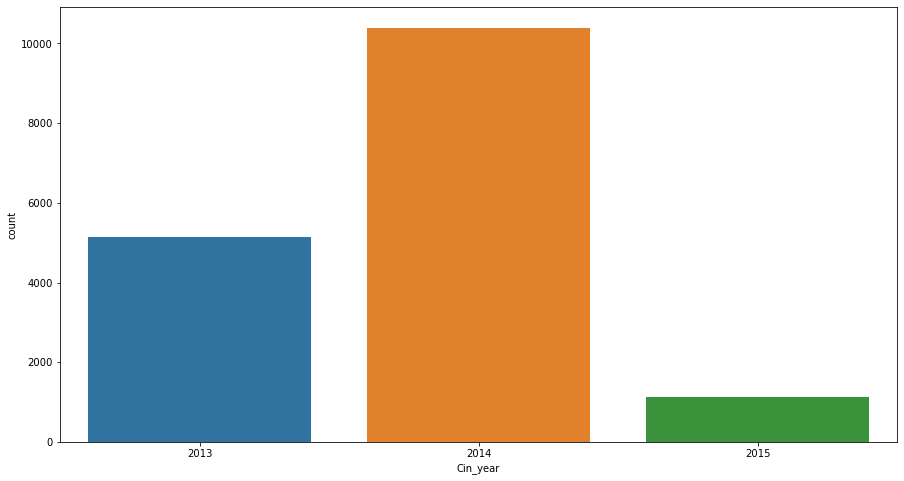

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot('Cin_year',data=train[train['is_booking']==1])

**Bookings by customer in each year. This helps us to understand Expedia business i.e in 2013 was good, then during 2014 Expedia's business was at its peak then in 2015 Expedia's business was at its worst**

In [78]:
### 14. How many bookings in each month?

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cin_month', ylabel='count'>

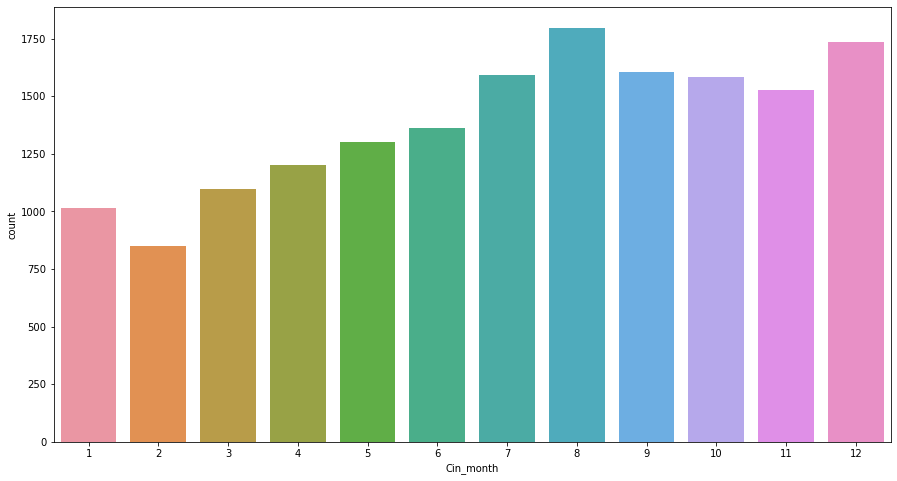

In [79]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot('Cin_month',data=train[train['is_booking']==1],order=list(range(1,13)))

**This graph tells us about the customer behaviour that is when the customer are more likely to book their hotels and want to travel with their family.**

**According to the graph we can deduce that during 8th month which is August, customers book hotels the most.** 

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cin_day', ylabel='count'>

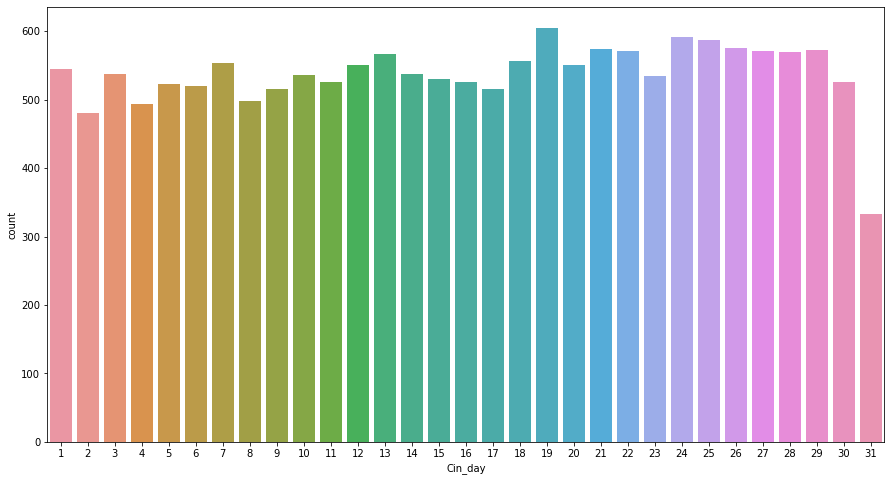

In [80]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot('Cin_day',data=train[train['is_booking']==1])

**According to the graph we can deduce that on 1st day of any month customers are likely more to travel and book hotels.**

**On 1st of each month customers get their salary and at that point they plan their trip**

In [81]:
### 16. Total Booking over the years

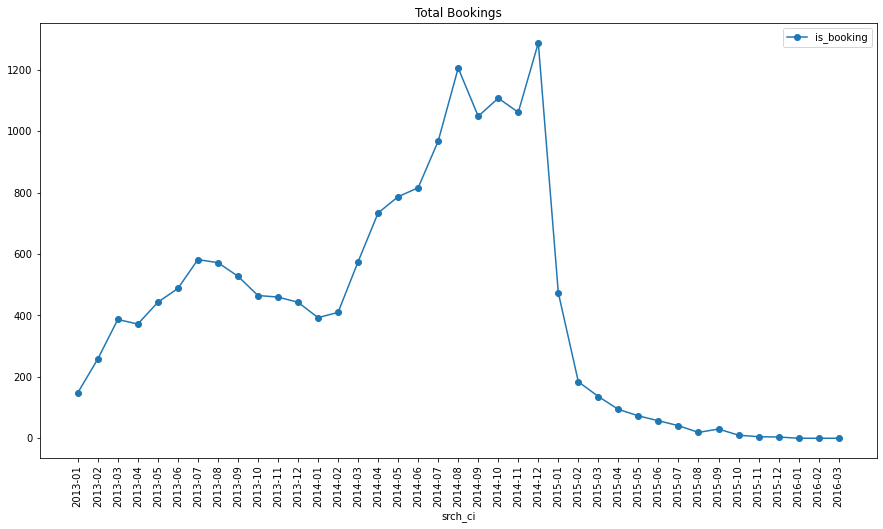

In [96]:
number_of_booking=train['srch_ci'].apply(lambda x:str(x)[:7])
date_bookings  = train.groupby(number_of_booking)["is_booking"].sum()
ax1 = date_bookings.plot(legend=True,marker='o',title="Total Bookings", figsize=(15,8)) 
ax1.set_xticks(range(len(date_bookings)))
xlabels = ax1.set_xticklabels(date_bookings.index.tolist(),rotation=90)

**A clear graph to follow the Expedia Business over the years 2013,2014,2015 and 2016, its high points and its low point**

### 17. Frequency of stay duration booked by customers

<AxesSubplot:xlabel='stay_duration', ylabel='count'>

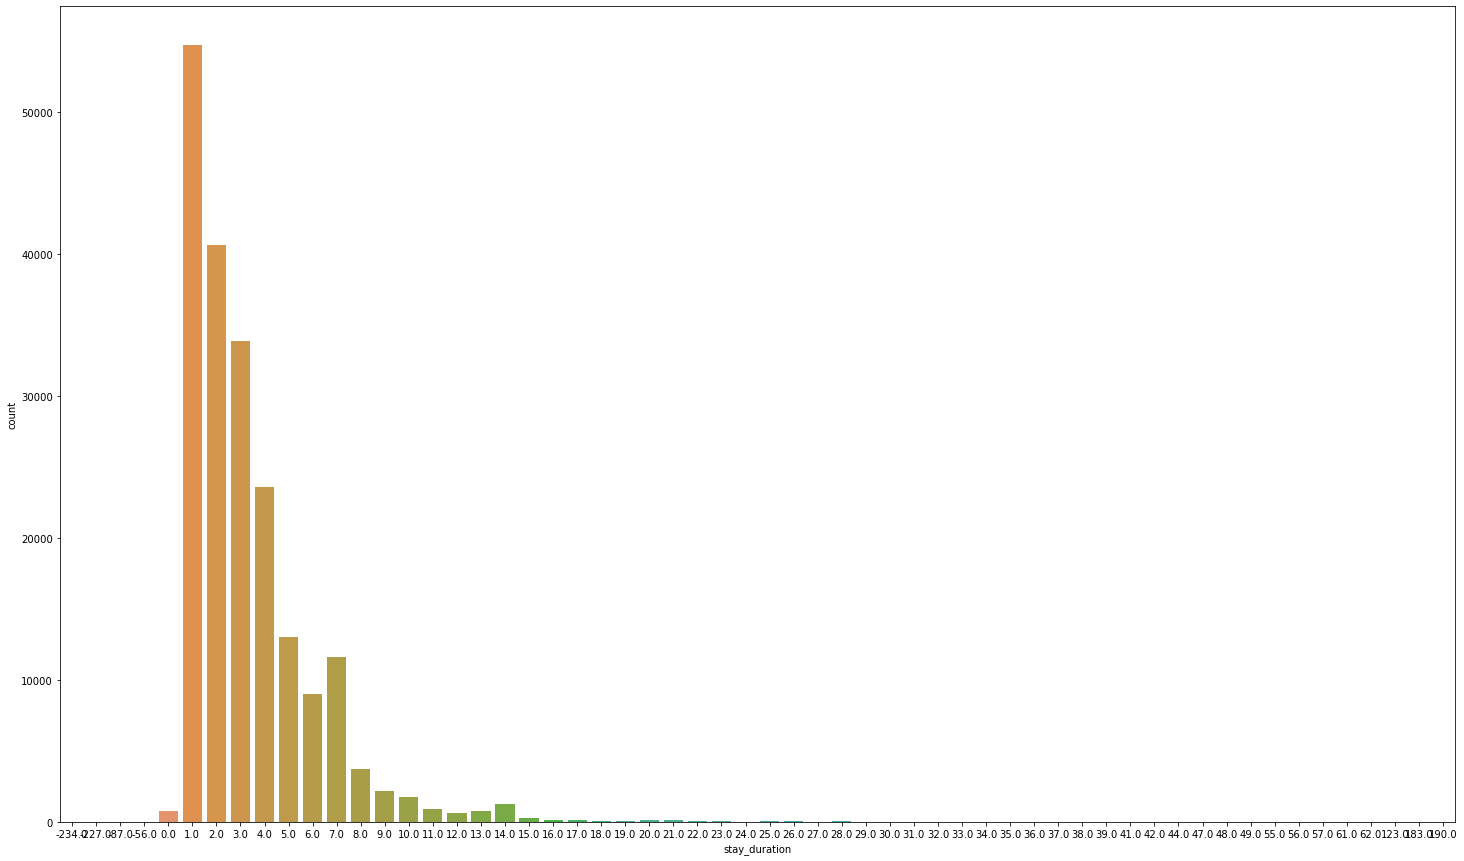

In [97]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.countplot(x="stay_duration", data=train)

In [98]:
train['stay_duration'].max()

190.0

## Data Cleaning 

**Data cleaning is the process of cleaning / standardising the data to make it ready for analysis. Most of times, there will be discrepancies in the captured data such as incorrect data formats, missing data, errors while capturing the data.**

In [100]:
train.corr()["hotel_cluster"].sort_values()

srch_destination_type_id    -0.032532
hotel_country               -0.026294
is_booking                  -0.025482
user_location_country       -0.021887
site_name                   -0.021180
srch_destination_id         -0.012461
hotel_continent             -0.008548
srch_rm_cnt                 -0.007158
user_id                     -0.001641
Cin_day                     -0.000919
channel                     -0.000509
Cin_month                    0.000413
user_location_city           0.000651
is_mobile                    0.002645
cnt                          0.004474
srch_adults_cnt              0.006847
user_location_region         0.007733
Cin_year                     0.009051
posa_continent               0.010042
srch_children_cnt            0.011422
orig_destination_distance    0.011877
no_of_prior_days_booking     0.027411
hotel_market                 0.032740
stay_duration                0.043633
is_package                   0.051934
hotel_cluster                1.000000
Name: hotel_

This tell us that no column correlate linearly with hotel_cluster.

##Removing unnecessary columns**

In [102]:
columns = ['date_time', 'srch_ci', 'srch_co']
train.drop(columns=columns,axis=1,inplace=True)
test.drop(columns=columns,axis=1,inplace=True)

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199823 entries, 0 to 199999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   site_name                  199823 non-null  int64  
 1   posa_continent             199823 non-null  int64  
 2   user_location_country      199823 non-null  int64  
 3   user_location_region       199823 non-null  int64  
 4   user_location_city         199823 non-null  int64  
 5   orig_destination_distance  199823 non-null  float64
 6   user_id                    199823 non-null  int64  
 7   is_mobile                  199823 non-null  int64  
 8   is_package                 199823 non-null  int64  
 9   channel                    199823 non-null  int64  
 10  srch_adults_cnt            199823 non-null  int64  
 11  srch_children_cnt          199823 non-null  int64  
 12  srch_rm_cnt                199823 non-null  int64  
 13  srch_destination_id        19

In [107]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39999 entries, 0 to 39998
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         39999 non-null  int64  
 1   site_name                  39999 non-null  int64  
 2   posa_continent             39999 non-null  int64  
 3   user_location_country      39999 non-null  int64  
 4   user_location_region       39999 non-null  int64  
 5   user_location_city         39999 non-null  int64  
 6   orig_destination_distance  39999 non-null  float64
 7   user_id                    39999 non-null  int64  
 8   is_mobile                  39999 non-null  int64  
 9   is_package                 39999 non-null  int64  
 10  channel                    39999 non-null  int64  
 11  srch_adults_cnt            39999 non-null  int64  
 12  srch_children_cnt          39999 non-null  int64  
 13  srch_rm_cnt                39999 non-null  int

In [108]:
Y = train['hotel_cluster']
X = train.drop(['hotel_cluster'],axis=1)

## Dividing the train dataset into 2 parts

1. Learning Dataset
2. Test Dataset

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
print(len(X_train))
print(len(X_test))

169849
29974


## 1. First Algorithm - Random Forest

---



**Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean/average prediction of the individual trees.**

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


#Training

rf = RandomForestClassifier(n_estimators=80)
rf.fit(X_train, Y_train)


#Prediction

rf_train_prediction = rf.predict(X_train)
rf_test_prediction = rf.predict(X_test)

#Accuracy

train_accuracy = accuracy_score(Y_train,rf_train_prediction)
test_accuracy = accuracy_score(Y_test,rf_test_prediction)
rf_accuracy = test_accuracy


#Print

print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Train Accuracy: 91.19%
Test Accuracy: 33.09%


In [115]:
rfc=RandomForestClassifier(n_estimators=10, max_features='auto',
                          random_state=101)
rfc.fit(X_train, Y_train)
preds=rfc.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.33      0.43      0.37       306
           1       0.48      0.57      0.52       362
           2       0.32      0.38      0.35       375
           3       0.23      0.24      0.24       172
           4       0.26      0.30      0.28       299
           5       0.20      0.24      0.22       497
           6       0.31      0.33      0.32       332
           7       0.33      0.37      0.35       226
           8       0.42      0.41      0.41       301
           9       0.28      0.31      0.29       392
          10       0.21      0.23      0.22       299
          11       0.21      0.24      0.23       263
          12       0.34      0.35      0.35       192
          13       0.40      0.36      0.38       309
          14       0.21      0.19      0.20       181
          15       0.30      0.29      0.30       247
          16       0.32      0.34      0.33       427
          17       0.20    

In [ ]:
## accuracy score is around 32% under the random forest tree algorithmn

In [ ]:
## hyperparameter tuning 

## 2. Second Algorithm - Guassian Naive Bayes

**In statistics, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features.**

In [117]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#Training

gnb = GaussianNB()
gnb.fit(X_train,Y_train) 

#Prediction

gnb_train_prediction = gnb.predict(X_train)
gnb_test_prediction = gnb.predict(X_test)

#Accuracy

train_accuracy=accuracy_score(Y_train,gnb_train_prediction)
test_accuracy=accuracy_score(Y_test,gnb_test_prediction)
gnb_accuracy = test_accuracy

#Print

print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Train Accuracy: 6.16%
Test Accuracy: 6.16%


**Naive Bayes are not good enough to generalize over the entire data and produce very less results compared to other methods. This can be due to the fact that most features in the dataset are either one-hot vectors or have missing values, both of which become hindrances in achieving a good solution using this method.**

## 3. Third Algorithm - Logistic Regression

**Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).**

**The model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc.**

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Training

lr = LogisticRegression()
lr.fit(X_train, Y_train)

#Prediction

lr_train_prediction = lr.predict(X_train)
lr_test_prediction = lr.predict(X_test)

#Accuracy

train_accuracy=accuracy_score(Y_train,lr_train_prediction)
test_accuracy=accuracy_score(Y_test,lr_test_prediction)
lr_accuracy = test_accuracy

#Print

print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Train Accuracy: 3.15%
Test Accuracy: 3.23%


/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 4. Fourth Algorithm - KNN

**K-Nearest Neighbors (KNN) is one of the simplest algorithms used in Machine Learning for regression and classification problem. KNN algorithms use data and classify new data points based on similarity measures (e.g. distance function). Classification is done by a majority vote to its neighbors.**

In [121]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score

#Training

knn = neighbors.KNeighborsClassifier()
knn.fit(X_train,Y_train)

#Prediction

knn_train_prediction = knn.predict(X_train)
knn_test_prediction = knn.predict(X_test)

#Accuracy

train_accuracy=accuracy_score(Y_train,knn_train_prediction)
test_accuracy=accuracy_score(Y_test,knn_test_prediction)
knn_accuracy = test_accuracy

#Print

print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0)) #42
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0)) #21

Train Accuracy: 45.20%
Test Accuracy: 22.35%


## 5. Fifth Algorithm - XGBoost

**XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.**

In [127]:
!brew install libomp
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#Training

xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

#Prediction

xgb_train_prediction = xgb.predict(X_train)
xgb_test_prediction = xgb.predict(X_test)

#Accuracy

train_accuracy = accuracy_score(Y_train, xgb_train_prediction)
test_accuracy = accuracy_score(Y_test, xgb_test_prediction)
xgb_accuracy = test_accuracy

#Printing

print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0)) #52
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0)) #28

Updating Homebrew...
==> Homebrew is run entirely by unpaid volunteers. Please consider donating:
  https://github.com/Homebrew/brew#donations
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
airspyhf                   firefoxpwa                 pari-galpol
apt                        fst                        pari-seadata
aws-vault                  ghostunnel                 pari-seadata-big
bash_unit                  go@1.16                    procps
basis_universal            h2c                        pyoxidizer
bubblewrap                 hubble                     python-launcher
bupstash                   i2c-tools                  reproc
cargo-bloat                influxdb-cli               rsc_2fa
cargo-llvm-lines           joplin-cli                 singularity
cargo-outdated             kn                         spirv-llvm-translator
chrpath                    libaec                     spot
cilium-cli                 licensefinde

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:16:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy: 51.61%
Test Accuracy: 29.18%


**XGBoost has a performance very slightly less to that of Random Forest. This is because both these methods work in a similar manner, handling both categorical features efficiently.**.

## 6. Sixth Algorithm - Decision Tree

**A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.**

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Training

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

#Prediction

dt_train_prediction = dt.predict(X_train)
dt_test_prediction = dt.predict(X_test)

#Accuracy

train_accuracy = accuracy_score(Y_train, dt_train_prediction)
test_accuracy = accuracy_score(Y_test, dt_test_prediction)
dt_accuracy = test_accuracy

#Printing

print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0)) #70
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0)) #27

Train Accuracy: 91.20%
Test Accuracy: 33.32%


In [129]:
accuracy=[rf_accuracy*100,gnb_accuracy*100,lr_accuracy*100,knn_accuracy*100,xgb_accuracy*100,dt_accuracy*100]
accuracy

[33.09201307800093,
 6.155334623340228,
 3.2328017615266567,
 22.352705678254488,
 29.17862147194235,
 33.32221258423967]

In [ ]:
# We find that random tree and decision tree have relatively good test predictions. 

In [130]:
prob_predictions_train = rf.predict_proba(X_train)
prob_predictions_train

array([[0.        , 0.        , 0.        , ..., 0.025     , 0.0375    ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.0375    ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0125    , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0125    , 0.34092262,
        0.        ]])

In [131]:
prob_predictions_test = rf.predict_proba(X_test)
prob_predictions_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0625    , 0.        , 0.0125    , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0125    ],
       [0.        , 0.0125    , 0.        , ..., 0.0125    , 0.0125    ,
        0.675     ],
       [0.        , 0.        , 0.18651786, ..., 0.        , 0.07232143,
        0.        ]])

In [132]:
# we have 100 hotel cluster 

prob_predictions_train.shape

(169849, 100)

In [142]:
top_train_hotel_clusters = prob_predictions_train.argsort(axis=1)
top_train_hotel_clusters

array([[ 0, 71, 67, ..., 98, 41, 53],
       [ 0, 70, 69, ..., 63, 81, 57],
       [ 0, 72, 71, ..., 98, 70, 69],
       ...,
       [ 0, 72, 71, ..., 36, 99, 43],
       [49, 71, 70, ..., 26,  0, 21],
       [ 0, 71, 70, ..., 68, 64, 98]])

In [143]:
prob_predictions_train[0,53], prob_predictions_train[0,0]

(0.7, 0.0)

In [144]:

# we flip it because 53 has the highest probability 
np.flip(prob_predictions_train.argsort(axis=1), axis=1)

array([[53, 41, 98, ..., 67, 71,  0],
       [57, 81, 63, ..., 69, 70,  0],
       [69, 70, 98, ..., 71, 72,  0],
       ...,
       [43, 99, 36, ..., 71, 72,  0],
       [21,  0, 26, ..., 70, 71, 49],
       [98, 64, 68, ..., 70, 71,  0]])

In [145]:
temp = np.flip(prob_predictions_train.argsort(axis=1), axis=1)[:,0:5]
temp

array([[53, 41, 98, 97, 34],
       [57, 81, 63, 20, 85],
       [69, 70, 98, 21, 41],
       ...,
       [43, 99, 36, 26, 27],
       [21,  0, 26, 94, 28],
       [98, 64, 68, 97, 95]])

In [146]:
# actual variable the algorithm should be predicted 
# we can see three are a lot of overlaps 
Y_train

119465    53
38940     57
30440     69
44200     98
140599    83
          ..
73397     67
109336    64
50086     43
5194      21
128134    68
Name: hotel_cluster, Length: 169849, dtype: int64

In [147]:
rf_train_prediction

array([53, 57, 69, ..., 43, 21, 98])

In [148]:
# reset index and then we can compare it with predicition
y_train_index_reset = Y_train.reset_index(drop=True)
y_train_index_reset

0         53
1         57
2         69
3         98
4         83
          ..
169844    67
169845    64
169846    43
169847    21
169848    68
Name: hotel_cluster, Length: 169849, dtype: int64

In [152]:
# y_train_index_reset = Y_train.reset_index()
predicted_in_top_5 = 0
for i in range(len(y_train_index_reset)-1):
    if y_train_index_reset[i] in temp[i,:]:
        predicted_in_top_5 = predicted_in_top_5 + 1
predicted_in_top_5

168818

In [153]:
predicted_in_top_5/len(y_train_index_reset) * 100

99.39299024427581

In [155]:
# write all previous sytax in one cell


# this is train dataset 
k = 5
temp = np.flip(prob_predictions_train.argsort(axis=1), axis=1)[:,0:k]
predicted_in_top_k = 0
for i in range(len(y_train_index_reset)-1):
    if y_train_index_reset[i] in temp[i,:]:
        predicted_in_top_k = predicted_in_top_k + 1
predicted_in_top_k
accuracy = predicted_in_top_k/len(y_train_index_reset) * 100
print(accuracy)

99.39299024427581


In [154]:
# top_test_hotel_clusters = prob_predictions_test.argsort(axis=1)

# this is train dataset 
# accuracy increases to 60%
k = 5
temp = np.flip(prob_predictions_test.argsort(axis=1), axis=1)[:,0:k]
y_test_index_reset = Y_test.reset_index(drop=True)
predicted_in_top_k = 0
for i in range(len(y_test_index_reset)-1):
    if y_test_index_reset[i] in temp[i,:]:
        predicted_in_top_k = predicted_in_top_k + 1
predicted_in_top_k
accuracy = predicted_in_top_k/len(y_test_index_reset) * 100
print(accuracy)

60.439047174217656


In [156]:
# if k is set as 1, the prediction becomes 33% again.

k = 1
temp = np.flip(prob_predictions_test.argsort(axis=1), axis=1)[:,0:k]
y_test_index_reset = Y_test.reset_index(drop=True)
predicted_in_top_k = 0
for i in range(len(y_test_index_reset)-1):
    if y_test_index_reset[i] in temp[i,:]:
        predicted_in_top_k = predicted_in_top_k + 1
predicted_in_top_k
accuracy = predicted_in_top_k/len(y_test_index_reset) * 100
print(accuracy)

33.12203910055381
